To close out this lesson, you'll do two assessments. Both require you to create Jupyter Notebooks. Please submit links to your Notebooks at the end of this assessment.

# 1. Predicting temperature
In this exercise, you'll work with historical temperature data from the Szeged, Hungary, area. The dataset you'll use is a Postgres database version of this [dataset](https://www.kaggle.com/budincsevity/szeged-weather) from Kaggle. To complete this assessment, submit a Jupyter Notebook containing your solutions to the following tasks:
* First, load the dataset from the weatherinszeged table from Thinkful's database.
* Build a regression model where the target variable is `temperature`. As explanatory variables, use `humidity`, `windspeed`, `windbearing`, and `pressure`. Estimate the model using OLS.
* Now, check if your model meets the Gauss-Markov conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

Here are the credentials you can use to connect to the database:
```
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'
```

As in earlier assessments, be sure to close the database connection after initially pulling in your data.

# 2. House prices
To complete this assessment, submit a Jupyter Notebook containing your solutions to the following tasks:
* Load the *houseprices* data from Thinkful's database.
* Reimplement the model that you built in the previous lesson.
* Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.
* Be sure to close the database connection after initially pulling in your data.

In [1]:
# For the convenience, we will set all environment in this cell.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sqlalchemy import create_engine
from sklearn import linear_model
from scipy.stats import bartlett
from scipy.stats import levene
from scipy.stats import pearsonr
from statsmodels.tsa.stattools import acf

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'


## 1. Predicting temperature

In [2]:
# First, load the dataset from the weatherinszeged table from Thinkful's database.
engine_1 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged', con=engine_1)
engine_1.dispose()

weather_df.info()
weather_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   date                 96453 non-null  datetime64[ns, UTC]
 1   summary              96453 non-null  object             
 2   preciptype           96453 non-null  object             
 3   temperature          96453 non-null  float64            
 4   apparenttemperature  96453 non-null  float64            
 5   humidity             96453 non-null  float64            
 6   windspeed            96453 non-null  float64            
 7   windbearing          96453 non-null  float64            
 8   visibility           96453 non-null  float64            
 9   loudcover            96453 non-null  float64            
 10  pressure             96453 non-null  float64            
 11  dailysummary         96453 non-null  object             
dtypes: datetime64[ns, 

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
# Build a regression model where the target variable is `temperature`. 
Y_1 = weather_df['temperature']

# As explanatory variables, use `humidity`, `windspeed`, `windbearing`, and `pressure`. 
X_1 = weather_df[['humidity', 'windspeed', 'windbearing', 'pressure']]
# Add constant.
X_1 = sm.add_constant(X_1)

# Estimate the model using OLS.
lrm_1 = linear_model.LinearRegression()

# Fit method estimates the coefficietns using OLS.
lrm_1.fit(X_1, Y_1)

# Inspect the results:
print('\nCoefficients: \n', lrm_1.coef_)
print('\nIntercept: \n', lrm_1.intercept_)

results_1 = sm.OLS(Y_1, X_1).fit()
results_1.summary()


Coefficients: 
 [ 0.00000000e+00 -3.24962454e+01 -2.01413742e-01  4.04836936e-03
 -6.91759209e-04]

Intercept: 
 37.92643818528566


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:47:29   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [4]:
# Now, check if your model meets the Gauss-Markov conditions above.
# If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

#### Assumption 1: Linearity of the model in its coefficients.
The weather model take into account the linearity assumption.

#### Assumption 2: The error term's expected value.

In [5]:
predictions_1 = lrm_1.predict(X_1)
errors_1 = Y_1 - predictions_1
print("Mean of the errors in the weather model is {}.".format(np.mean(errors_1)))

Mean of the errors in the weather model is -2.682703444870319e-15.


I have added the constant term in my model, so the average of the model's error is effectively `0`.

#### Assumption 3: Homoscedasticity

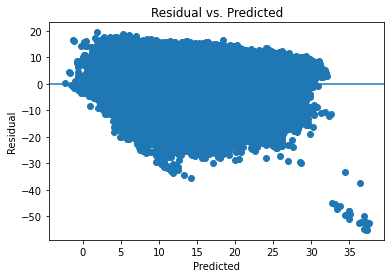

Bartlett test statistic value is 2464.84 and p value is 0.
Levene test statistic value is 2321.24 and p value is 0.


In [6]:
plt.scatter(predictions_1, errors_1)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y = 0)
plt.title('Residual vs. Predicted')
plt.show()

bart_stats_1 = bartlett(predictions_1, errors_1)
lev_stats_1 = levene(predictions_1, errors_1)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}.".format(bart_stats_1[0], bart_stats_1[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}.".format(lev_stats_1[0], lev_stats_1[1]))

The p-values of both tests are lower than `0.05`, which indicates that the errors are heteroscedastic.

In order to fix this issue, you may deal with outliers and include relevant variables. You may also transform the dependent variables using Cox transformation or log transformation. 

#### Assumption 4: Low multicollinearity

In [7]:
X_1.corr()

,const,humidity,windspeed,windbearing,pressure
const,NaN,NaN,NaN,NaN,NaN
humidity,NaN,1.000000,-0.224951,0.000735,0.005454
windspeed,NaN,-0.224951,1.000000,0.103822,-0.049263
windbearing,NaN,0.000735,0.103822,1.000000,-0.011651
pressure,NaN,0.005454,-0.049263,-0.011651,1.000000


There seems to be a strong corelation between humidity and windbearing, humidity and pressure, windspeed and pressure, and windbearing and pressure. 

In order to fix this issue, we can use PCA or by discarding pressure from the variables.

#### Assumption 5: Uncorrelated error terms

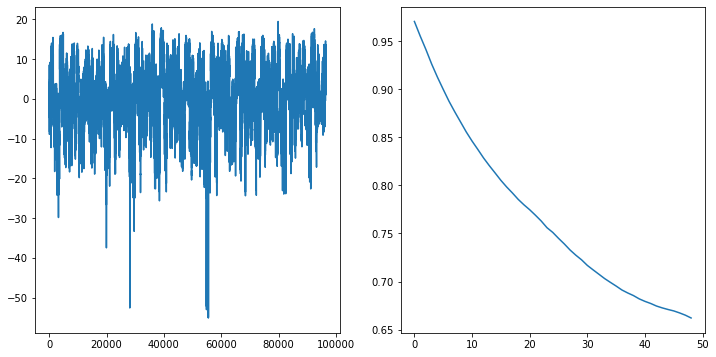

In [8]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(errors_1)

plt.subplot(1, 2, 2)
acf_data_1 = acf(errors_1)
plt.plot(acf_data_1[1:])

plt.show()

The errors terms seems to be correlated to each other, especially on the autocorrelation function. 

#### Assumption 6: Independence of the features and errors

## 2. Houseprices

In [9]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

# Load the houseprices data from Thinkful's database.
engine_2 = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houseprices_df = pd.read_sql_query('select * from houseprices', con=engine_2)
engine_2.dispose()

houseprices_df.info()
houseprices_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


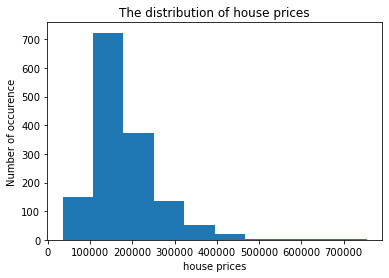


Coefficients: 
 [ 0.00000000e+00 -1.32788806e+18 -1.32788806e+18 -1.32788806e+18
 -1.32788806e+18 -1.32788806e+18 -1.32788806e+18 -1.32788806e+18
 -1.32788806e+18 -1.32788806e+18 -1.32788806e+18]

Intercept: 
 1.3278880585991644e+18


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     349.0
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        19:47:31   Log-Likelihood:                -17703.
No. Observations:                1460   AIC:                         3.543e+04
Df Residuals:                    1450   BIC:                         3.548e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.71e+05   4040.647     42.331      0.000    1.63e+05    1.79e+05
1          -1.209e+05   2.89e+04     -4.179      0.000   -1.78e+05   -6.42e+04
2          -1.193e+05   2.37e+04     -5.026      0.000   -1.66e+05   -7.27e+04
3          -8.357e+04   9918.245     -8.426      0.000   -1.03e+05   -6.41e+04
4          -6.262e+04   5520.188    -11.345      0.000   -7.35e+04   -5.18e+04
5          -3.752e+04   4523.280     -8.295      0.000   -4.64e+04   -2.86e+04
6          -9441.9191   4551.291     -2.075      0.038   -1.84e+04    -514.101
7           3.667e+04   4633.649      7.914      0.000    2.76e+04    4.58e+04
8           1.037e+05   5108.235     20.299      0.000    9.37e+04    1.14e+05
9           1.965e+05   7381.543     26.616      0.000    1.82e+05    2.11e+05
10          2.675e+05   1.04e+04     25.806      0.000    2.47e+05    2.88e+05
==============================================================================
Omnibus:                      377.831   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3528.673
Skew:                           0.929   Prob(JB):                         0.00
Kurtosis:                      10.386   Cond. No.                     7.87e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.86e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
# Reimplement the model that you built in the previous lesson.
# Build a regression model where the target variable is `temperature`. 
plt.hist(houseprices_df.saleprice)
plt.title("The distribution of house prices")
plt.xlabel("house prices")
plt.ylabel("Number of occurence")
plt.show()

# I decided to use the overall condition for predicting the houseprice.
houseprices_df['overallqual'].value_counts()
cond_df = pd.get_dummies(houseprices_df['overallqual'])

Y = houseprices_df['saleprice']
X = cond_df
X = sm.add_constant(X)

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)

results = sm.OLS(Y, X).fit()
results.summary()

In [11]:
# Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.
# Be sure to close the database connection after initially pulling in your data.

#### Assumption 1: Linearity of the model in its coefficients.
This model takes into account the linearity assumption, so you shouldn't worry about this assumption at all.

#### Assumption 2: The error term's expected value.

In [12]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is {}.".format(np.mean(errors)))

Mean of the errors in the medical costs model is 51.76027397260274.


/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


The error term is not close to 1, and the model systematically overpredicts the target variable. 

#### Assumption 3: Homoscedasticity.

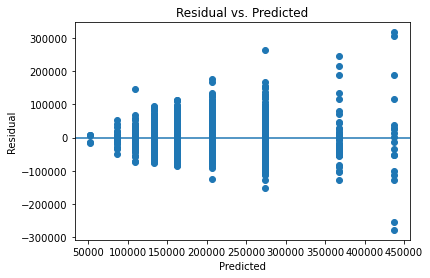

Bartlett test statistic value is 205.386 and p value is 1.4e-46.
Levene test statistic value 88.7808 and p value is 8.68e-21.


In [14]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}.".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value {0:3g} and p value is {1:.3g}.".format(lev_stats[0], lev_stats[1]))

The p-values of both tests are lower than `0.05`, which indicates that the errors are heteroscedastic.

In order to fix this issue, you may deal with outliers and include relevant variables. You may also transform the dependent variables using Cox transformation or log transformation. 

#### Assumption 4: Low multicollinearity

In [15]:
X.corr()

,const,1,2,3,4,5,6,7,8,9,10
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.000000,-0.001681,-0.004365,-0.010881,-0.022634,-0.021735,-0.019583,-0.013355,-0.006452,-0.004138
2,NaN,-0.001681,1.000000,-0.005348,-0.013331,-0.027731,-0.026629,-0.023993,-0.016363,-0.007905,-0.005070
3,NaN,-0.004365,-0.005348,1.000000,-0.034623,-0.072022,-0.069160,-0.062314,-0.042497,-0.020530,-0.013167
4,NaN,-0.010881,-0.013331,-0.034623,1.000000,-0.179539,-0.172405,-0.155339,-0.105938,-0.051177,-0.032823
5,NaN,-0.022634,-0.027731,-0.072022,-0.179539,1.000000,-0.358632,-0.323133,-0.220370,-0.106458,-0.068278
6,NaN,-0.021735,-0.026629,-0.069160,-0.172405,-0.358632,1.000000,-0.310294,-0.211614,-0.102228,-0.065565
7,NaN,-0.019583,-0.023993,-0.062314,-0.155339,-0.323133,-0.310294,1.000000,-0.190667,-0.092109,-0.059075
8,NaN,-0.013355,-0.016363,-0.042497,-0.105938,-0.220370,-0.211614,-0.190667,1.000000,-0.062816,-0.040288
9,NaN,-0.006452,-0.007905,-0.020530,-0.051177,-0.106458,-0.102228,-0.092109,-0.062816,1.000000,-0.019463


None of the variables seem to fit the model well.

#### Assumption 5: Uncorrelated error terms

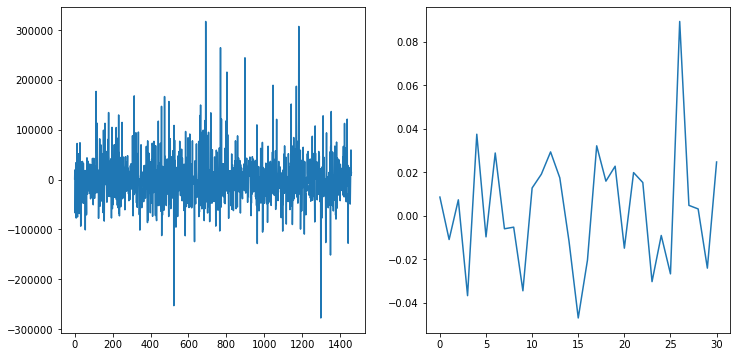

In [16]:
plt.figure(figsize = (12, 6))

plt.subplot(1, 2, 1)
plt.plot(errors)

plt.subplot(1, 2, 2)
acf_data = acf(errors)
plt.plot(acf_data[1:])

plt.show()

The autocorrelation between the errors are very low. The error terms are uncorrelated and this meets the assumption.

#### Assumption 6: Indepdendence of the features and errors